Team Blue

ajkdkjandkwakjn

The following is a project to predict the house prices for California. This project uses sci-kitlearn's LinearRegression model

We start by importing the libraries we'll need

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl

We load our dataset

In [3]:
data=pd.read_csv('/Users/aryamanbhatia/Downloads/housing.csv')

In [4]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


This is our dataset! It has 20000+ entries and multiple columns. Our target variable, which refers to the column we are trying to predict, is the "median_house_value". We now perform data.info() to gain some more information about our dataset

Let's look at all our data plotted

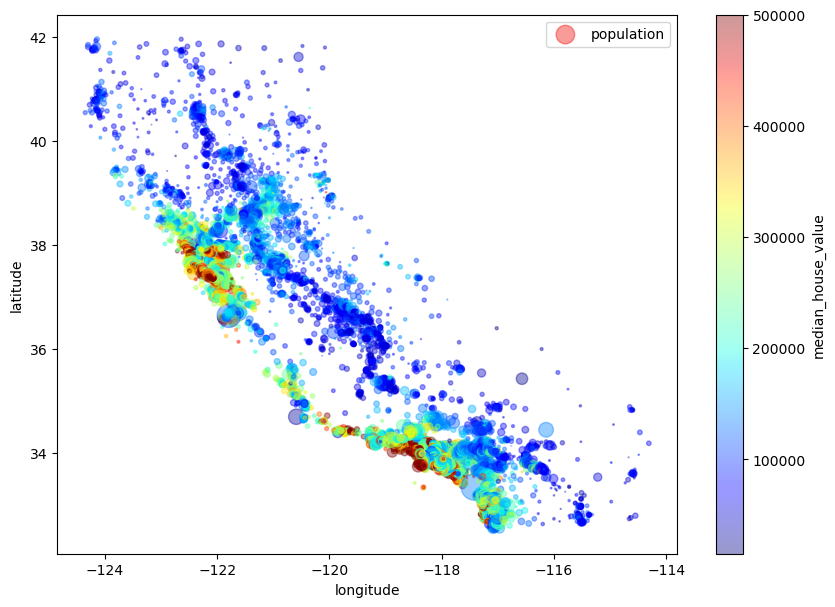

In [5]:
data.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
        s=data["population"]/100, label="population", figsize=(10,7),
        c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    )

plt.legend()

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


This shows us some interesting stuff. One thing to note is that the column "total_bedrooms" seems to not have the same count as the rest. This means that there are some missing values in our dataset. We'll be fixing this in the future.

Now let's graph this data. We use the hist() function, where we define bins and the size of the figure of our histogram. On the y-axis we have the serial number and on the x-axis the actual data to which the instance corresponds

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

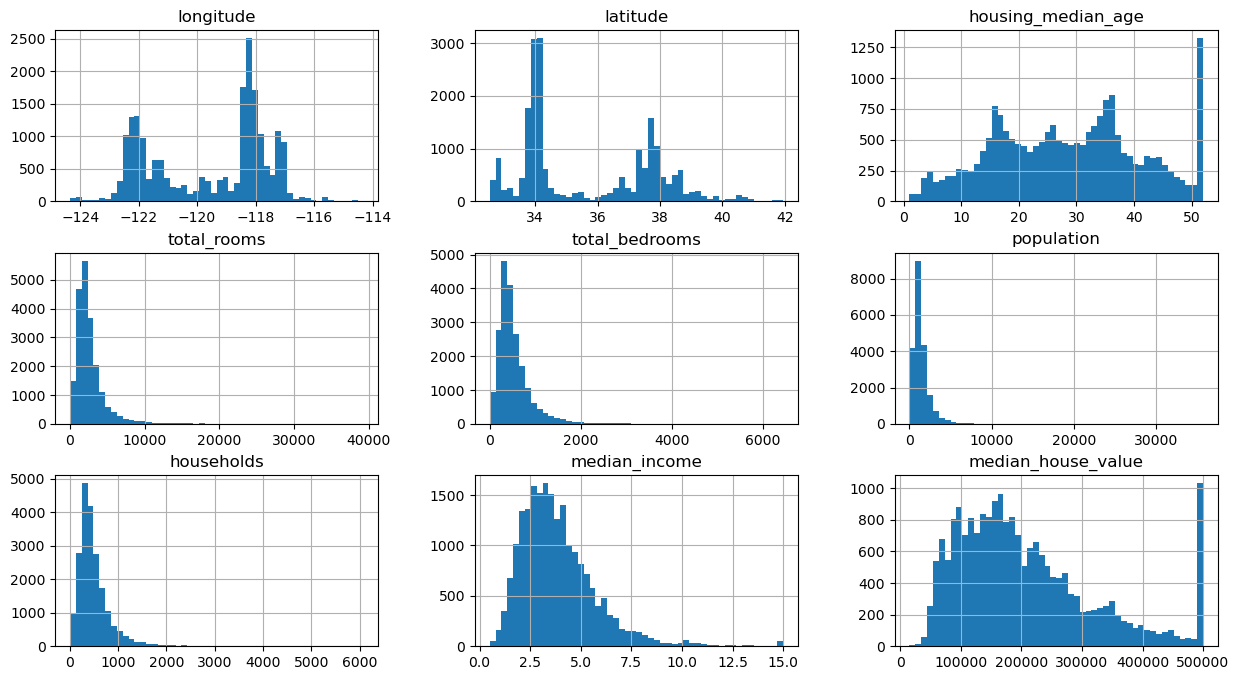

In [7]:
data.hist(bins=50, figsize=(15,8))

We used "bins=50" while making our histogram. Bins, also known as intervals or buckets, is a way to group numerical data into smaller, more manageable segments. Binning is useful when dealing with large datasets or when trying to identify patterns in data that may not be immediately apparent. If we would have said "bins=1", we would have got one giant block in all of our histograms, if we had done 'bins=100' we would have gotten extremely thin lines in our histrogram. 

Now let's take a look at 'median_income'. It makes sense that "median_income" would be an important column because the income of a person directly affects what kind of house they can afford. Hence, let's take a closer look at it. 

Another way we can ensure that we are looking at a column that is in fact important, we can make a correlation matrix

In [8]:
corr_matrix = data.corr()

corr_matrix['median_house_value'].sort_values(ascending=True)

latitude             -0.144160
longitude            -0.045967
population           -0.024650
total_bedrooms        0.049686
households            0.065843
housing_median_age    0.105623
total_rooms           0.134153
median_income         0.688075
median_house_value    1.000000
Name: median_house_value, dtype: float64

We can also plot this data as a heatmap, which would help us visualise this data better when we have a lot of columns and its not easy to read through this table

<AxesSubplot:>

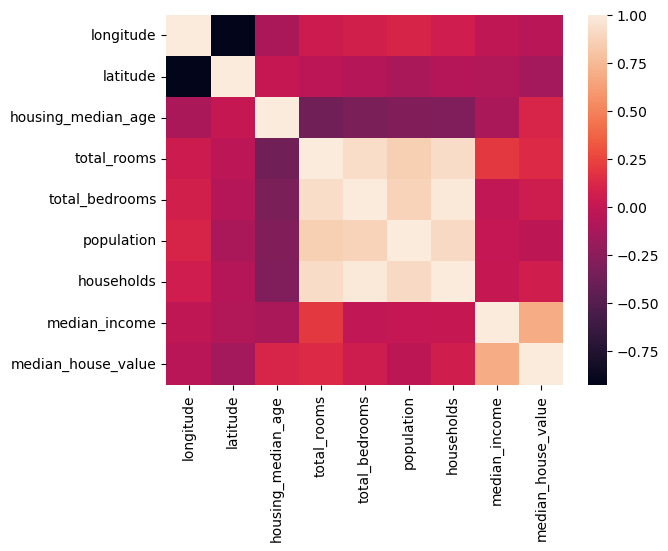

In [9]:
sns.heatmap(corr_matrix)

A correlation matrix is essentially a table that shows how strongly correlated each attribute is to a certain attribute. In this case, we are trying to see which attribute is strongly correlated to "median_house_value". This is known as calculating the standard correlation coefficient, or Pearson's r between two attributes. Pearsons r is commonly used in statistics to measure the correlation between two things. The values range from -1 to 1, where -1 shows the highest negative correlation and 1 shows high positive correlation between the two variables. Negative values show that the attribute is inversely proportional, and positive attributes show that the value is directly proportional. By correlation we mean how changing one attribute will change another attribute, and will it do it positively or negatively. For example, if the correlation is negative, like in latitude, this means that if the value of latitude goes down, the median house value will go up. Or if the correlation is positive, as in total_bedrooms, we will see that as the number of total bedrooms increases, the median house value will increase, which makes sense. The greater the numerical value, the stronger the correlation. We can see how 'median_house_value' has a corelation with 'median_house_value' of 1, which makes complete sense as both are the same thing. The reason we apply Pearson's R in our data set is so that we can see which variable is most correlated with housing prices. After doing this, we find that the correlation that has the highest correlation with the house prices is the median household income, having a correlation of 0.688075. 

So let's have a look at that

<AxesSubplot:>

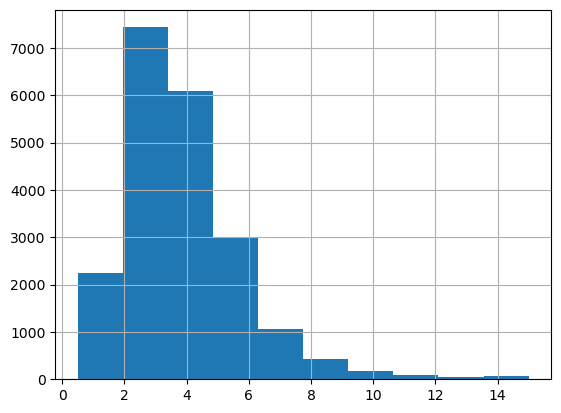

In [10]:
data['median_income'].hist()

On the y-axis we have the number of instances and on the x-axis we have the median income, in tens of thousands. We notice that the graph has some skewness. Skewness refers to the asymmetry of the graph.
Since there is a lot of skewness (right skewed) in that data due to the high median income, we will split that numerical variable into different categories which will make the distribution a lot better. This also helps us understand what kind of houses people belonging to different income categories buy. 

To do this, we'll make a new column called "income_cat"


In [11]:
data["income_cat"] = pd.cut(data["median_income"], bins=[0., 1.5, 3.0, 4.5, 6., np.inf], labels=[1, 2, 3, 4, 5])
#this divides the median income into 5 categories ranging from 0-15000,15000-30000, 30000-45000, 45000-60000, 60000-60000+ and so on. np.inf refers to infinity or "so on"
#when we do data then we see that each row has been assigned to a certain value
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,2
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,2
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,2
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,2


"income_cat" is essentially the 'median_income' category divided into 5 bins, 1, 2, 3, 4, 5. Each of these bins corresponds to the income ranges 0-15000, 15000-30000, 30000-45000, 45000-60000, 60000-60000+ respectively. For example, if income_cat for a certain row is 2, that means the person earns 15000-30000 dollars. 

<AxesSubplot:>

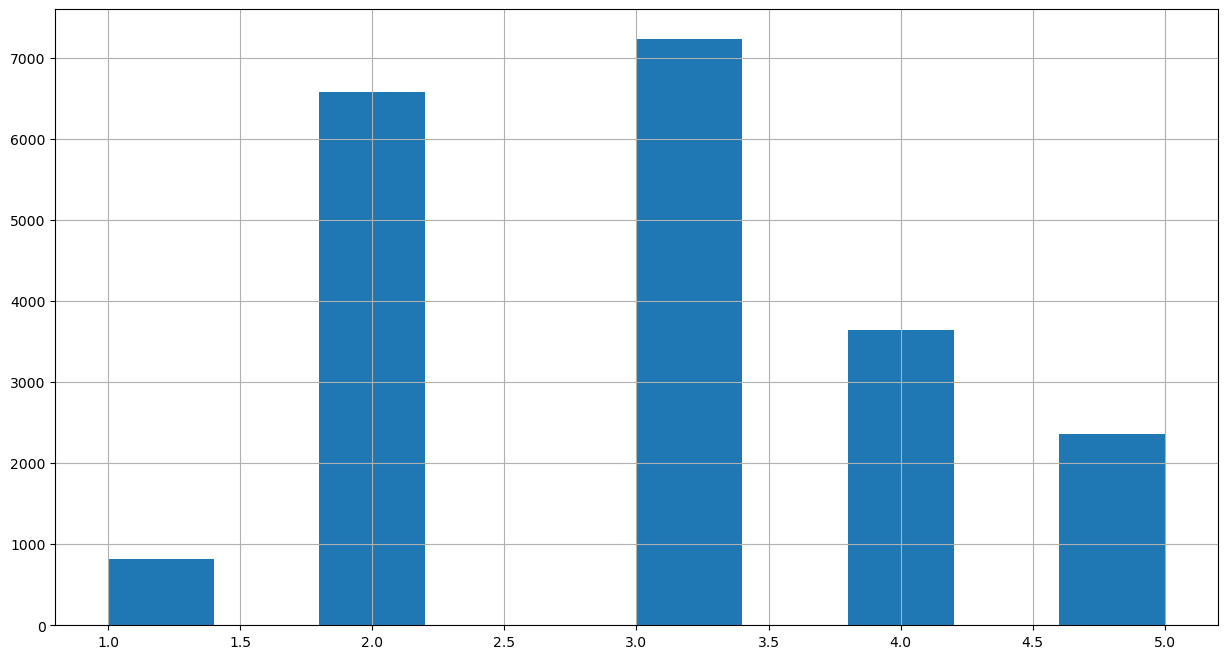

In [12]:
data['income_cat'].hist(figsize=(15,8))

Now, we have a column that represents the income categories of people and how many people are in each category. Why did we do all this work? You'll see in a moment

Now it's time to seperate the dataset into training and testing set. But we can't just split it randomly. We need to split it in such a way that the distribution is done fairly. In other words, we need to do some stratified sampling. Stratified sampling is the process of creating subgroups within a population to ensure that each subgroup is adequately represented in a sample. Here's a very basic example. Let's say we have surveyed a hundred children, some of whom are girls and some of whom are boys. Let's say that the survey is in such a way that girls and boys give different responses to the survey. Now, let's say I cannot read all 100 responses to the survey, so I decide to take 40 random responses of all the responses I had and read them. Now, this may result in some bias. What if of those 40 responses 35 are of boys and 5 are of girls? My inference would be very biased towards the boys. So, in order to gain a good understanding, I make sure to use 20 boys and 20 girls's responses.

Strata or stratum refers to the subgroup in a dataset. Hence we call it stratified sampling. 

Now, we will do stratified sampling on our dataset and extract about 20% of the dataset to be used as our testing data. We will do the stratified sampling based on the 'income_cat' column, so that the proportion of each income_cat group is in both training and testing sets. This is because as we saw earlier, it is an important factor

In [13]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(data, data['income_cat']):
  strat_train_set = data.loc[train_index]
  strat_test_set = data.loc[test_index]

Now we want to see how much of each category is in our data, ie we want to see just how stratified is our data. We want to see what percentage of each category is present in our income_cat category. This way we will know just how stratified our data is. To do this we can see the following. See how it adds up to 100.

In [14]:
data['income_cat'].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

In [15]:
strat_test_set['income_cat'].value_counts()/len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

Now that that is done, let's drop the income category and use our dataset as is

In [16]:
for items in (strat_train_set, strat_test_set):
  items.drop('income_cat', axis=1, inplace=True)

In [17]:
data= strat_train_set.copy()

Feature engineering: coming up with your own features for training

Before we apply the machine learning algorithm finally, we must first make some more columns. We have been provided with the total number of rooms, but this information is useless if we do not know how many rooms in a household exist. Similarly, we need to know the total number of bedrooms, as rooms would include kitchen and bathroom etc. Hence, we make the following columns to our table.

In [18]:
data["rooms_per_household"] = data["total_rooms"]/data["households"]
data["bedrooms_per_room"] = data["total_bedrooms"]/data["total_rooms"]
data["population_per_household"]=data["population"]/data["households"]


The command below shows our new columns

In [19]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND,5.485836,0.205784,3.168555
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN,6.927083,0.160714,2.623698
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND,5.393333,0.191595,2.223333
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN,3.886128,0.276505,1.859213
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN,6.096552,0.182692,3.167241
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,268500.0,<1H OCEAN,6.658342,0.184696,2.023976
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,90400.0,INLAND,5.571932,0.179977,3.363188
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,140400.0,<1H OCEAN,4.110465,0.234795,2.662791
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,258100.0,<1H OCEAN,6.297405,0.183835,2.411178


Let's see how these new columns compare to our target variable

In [20]:
corr_matrix = data.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

Interestingly, the more the number of bedrooms_per_room, the less expensive the house. This is just how the data is and is not a mistake

Now let's start preparing data for the ML algorithm

But first let’s revert to a clean training set (by copying strat_train_set once again), and let’s separate the predictors and the labels since we don’t necessarily want to apply the same transformations to the predictors and the target values (note that drop() creates a copy of the data and does not affect strat_train_set):

In [21]:
data = strat_train_set.drop('median_house_value', axis=1)
data_labels = strat_train_set['median_house_value'].copy()

Dropping null values

In [22]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 12655 to 19773
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16354 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


Notice the null values in "total_bedrooms". Now let's go ahead and fix that using something called SimpleImputer

SimpleImputer is a class in scikit-learn that can be used to replace the null values in a dataset. There are many ways to do this.

Firstly, let's extract all of the names of the columns that have null values

In [23]:
columns_with_null_values = data.columns[data.isna().any()].tolist()
print(columns_with_null_values)

['total_bedrooms']


Now we have a list of columns with null values

The following code helps extract the names of the non_numeric columns

In [24]:
non_numeric_columns = data.select_dtypes(exclude=['int64', 'float64']).columns
list_numeric_colums = non_numeric_columns.tolist()
list_numeric_colums
#for i in range(0, len(non_numeric_columns)):
    #str_non_numeric_column += (str(non_numeric_columns[i]) + ' ')
#print(str_non_numeric_column)

['ocean_proximity']

Now, for each column in the list with null values, a for loop run that takes out the median of the values of the code and replaces it with median of it.
It replaces missing values in the column with the median using the fillna() method with inplace=True, which modifies the DataFrame in place.

In [25]:
for i in range(0, len(columns_with_null_values)): 
  median = data[columns_with_null_values[i]].median() # option 3 
  data[columns_with_null_values[i]].fillna(median, inplace=True)

Another way to solve this issue is by using SimpleImputer. Here, SimpleImputer is imported and the strategy given is median, which means it will take out the median values and fill in the missing values. We drop the column with verbal values in it by using housing_num = data.drop(list_numeric_colums, axis=1). 

In [51]:
from sklearn.impute import SimpleImputer 
imputer = SimpleImputer(strategy="median")

housing_num = data.drop(list_numeric_colums, axis=1) #drops the verbal values
imputer.fit(housing_num)
imputer.statistics_ #shows us what values it will be filling

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [52]:
housing_num.median().values
X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns=housing_num.columns) #transforms the rest of the part into a dataframe

In [53]:
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
1,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
3,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
4,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964
...,...,...,...,...,...,...,...,...
16507,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900
16508,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139
16509,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797
16510,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964


In [55]:
housing_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.0 MB


As you can see, SimpleImputer also works. The issue is that since we have a column that does not have numbers in it, this method doesn't work for us so well. But we can use it in the future if needed

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 12655 to 19773
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


data has no more null values. Hence, we can move on. 

Now, we notice that the column "ocean_proximity" has values that are not numbers

In [30]:
housing_cat = data["ocean_proximity"]
housing_cat.head(10)


12655        INLAND
15502    NEAR OCEAN
2908         INLAND
14053    NEAR OCEAN
20496     <1H OCEAN
1481       NEAR BAY
18125     <1H OCEAN
5830      <1H OCEAN
17989     <1H OCEAN
4861      <1H OCEAN
Name: ocean_proximity, dtype: object

In [31]:
housing_cat

12655        INLAND
15502    NEAR OCEAN
2908         INLAND
14053    NEAR OCEAN
20496     <1H OCEAN
            ...    
15174     <1H OCEAN
12661        INLAND
19263     <1H OCEAN
19140     <1H OCEAN
19773        INLAND
Name: ocean_proximity, Length: 16512, dtype: object

One hot encoding is a technique used to convert categorical data into a numerical format that can be used in machine learning models. It involves creating a binary vector of length equal to the number of possible categories, where only one element is set to 1 to indicate the category of the data point and all other elements are set to 0.

In the California housing prediction model project, one hot encoding was used to convert the categorical variable "ocean_proximity" into integer values that could be used in the machine learning model. The "ocean_proximity" variable had five possible values: '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'NEAR BAY', and 'ISLAND'.
The reason for converting categorical data to a numerical format is that most machine learning algorithms require input data to be in a numerical format. One hot encoding is a way to represent categorical data as numerical data while preserving the information about the original categories.
We need to convert the data into an array to use it in machine learning algorithms. Most machine learning algorithms require input data to be in a numerical format, and using a numpy array allows us to efficiently store and manipulate large datasets. In the California housing price prediction model, the numpy array containing the one hot encoded data for ocean proximity, along with other features, was used to train and evaluate the machine learning model.


One hot encoding works something like this: 

Lets say we have a columns like so 

['INLAND', 'NEAR OCEAN', '<1H OCEAN', 'NEAR BAY', 'ISLAND']

Now, our data can only belong to one of each of these. Let's say a house is near the bay. So, when one hot encoded, it will look something like this.

00010

Which corresponds to 

['INLAND', 'NEAR OCEAN', '<1H OCEAN', 'NEAR BAY', 'ISLAND']


0           0             0            1           0

In [56]:
housing_cat_encoded, housing_categories = housing_cat.factorize()

Here, we take the ocean_proximity column and convert the verbal values into numbers, as by now we know that computers cannot work with words.

In [33]:
housing_cat_encoded[:10]

array([0, 1, 0, 1, 2, 3, 2, 2, 2, 2])

This is our ocean_proximity column now rewritten in the form of numbers

In [34]:
housing_categories

Index(['INLAND', 'NEAR OCEAN', '<1H OCEAN', 'NEAR BAY', 'ISLAND'], dtype='object')

This is the category to which each number corresponds. For example, 0 corresponds to INLAND, 2  to NEAR OCEAN, ETC. We could just use this too, but One Hot Encoding makes it easier to know the category without having to constantly refer to an index like this to see which number corresponds to which column

In [35]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(1,-1))

In [36]:
housing_cat_1hot

<1x16512 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [37]:
housing_cat_1hot.toarray()

array([[1., 1., 1., ..., 1., 1., 1.]])

And that is our column one hot encoded!

Now, we set up a pipeline. A pipeline allows us to do all the above steps quickly and all in one go. This is how advanced data scientists would do the above steps.

In [38]:
from sklearn.base import BaseEstimator, TransformerMixin

#here we are explaining the
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
  def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
  #this creates the bedrooms per room to the table
    self.add_bedrooms_per_room = add_bedrooms_per_room
  
  def fit(self, X, y=None):
    return self # nothing else to do
  
  def transform(self, X, y=None):
    #first calculate rooms per value
      rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
      population_per_household = X[:, population_ix] / X[:, households_ix]
    #we are simply doing the custom transformations
      
      if self.add_bedrooms_per_room:
        bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
        return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
      else:
        return np.c_[X, rooms_per_household, population_per_household]
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(data.values)

In [39]:
housing_extra_attribs = pd.DataFrame(housing_extra_attribs, columns=list(data.columns)+["rooms_per_household", "population_per_household"])

In [40]:
housing_extra_attribs

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
0,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND,5.485836,3.168555
1,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN,6.927083,2.623698
2,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.875,INLAND,5.393333,2.223333
3,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN,3.886128,1.859213
4,-118.7,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN,6.096552,3.167241
...,...,...,...,...,...,...,...,...,...,...,...
16507,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.09,<1H OCEAN,6.658342,2.023976
16508,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,INLAND,5.571932,3.363188
16509,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,<1H OCEAN,4.110465,2.662791
16510,-122.7,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,<1H OCEAN,6.297405,2.411178


In [41]:
housing_extra_attribs

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
0,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND,5.485836,3.168555
1,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN,6.927083,2.623698
2,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.875,INLAND,5.393333,2.223333
3,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN,3.886128,1.859213
4,-118.7,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN,6.096552,3.167241
...,...,...,...,...,...,...,...,...,...,...,...
16507,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.09,<1H OCEAN,6.658342,2.023976
16508,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,INLAND,5.571932,3.363188
16509,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,<1H OCEAN,4.110465,2.662791
16510,-122.7,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,<1H OCEAN,6.297405,2.411178


The following is a pipeline for simple imputer

In [42]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler())
])

housing_num_tr = num_pipeline.fit_transform(housing_num)
housing_num_tr

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.01739526,
         0.00622264, -0.12112176],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.56925554,
        -0.04081077, -0.81086696],
       [ 0.26758118, -0.1259716 ,  1.22045984, ..., -0.01802432,
        -0.07537122, -0.33827252],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ..., -0.5092404 ,
        -0.03743619,  0.32286937],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.32814891,
        -0.05915604, -0.45702273],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.01407228,
         0.00657083, -0.12169672]])

This is the pipeline for one hot encoding

In [43]:
from sklearn.compose import ColumnTransformer 
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
  ])
housing_prepared = full_pipeline.fit_transform(data)
housing_prepared

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]])

Now it's time for the actual Linear Regression. We import LinearRegression from sci-kit learn's and implement it

In [44]:
from sklearn.linear_model import LinearRegression 

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, data_labels)

LinearRegression()

That's it! That's the linear regression model run on our dataset. Let's see below the result of our model

In [45]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared,data_labels)
# trying the full pipeline on a few training instances

some_data = data.iloc[:5]
some_labels = data_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Prediction: ", lin_reg.predict(some_data_prepared))
print("Actual labels: ", list(some_labels))
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(data_labels,housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse
from sklearn.tree import DecisionTreeRegressor

Prediction:  [ 85657.90192014 305492.60737488 152056.46122456 186095.70946094
 244550.67966089]
Actual labels:  [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


As we can see, the results are not too far off from the actual result. We have used a machine learning model to predict our house prices! 